In [37]:
import numpy as np
import pandas as pd
import talib
import ta
from ta.trend import macd
import random
random.seed(42)
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [38]:
dataset = pd.read_csv('AAPL.csv')
dataset = dataset.dropna()
dataset = dataset[['Open', 'High', 'Low', 'Close']]

In [39]:
dataset

,Open,High,Low,Close
0,42.540001,43.075001,42.314999,43.064999
1,43.132500,43.637501,42.990002,43.057499
2,43.134998,43.367500,43.020000,43.257500
3,43.360001,43.842499,43.262501,43.750000
4,43.587502,43.902500,43.482498,43.587502
...,...,...,...,...
1003,177.089996,180.419998,177.070007,180.330002
1004,180.160004,181.330002,178.529999,179.289993
1005,179.330002,180.630005,178.139999,179.380005
1006,179.470001,180.570007,178.089996,178.199997


In [40]:
dataset['H-L'] = dataset['High'] - dataset['Low']
dataset['O-C'] = dataset['Close'] - dataset['Open']
dataset['3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset['10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset['30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset['Std_dev']= dataset['Close'].rolling(5).std()
dataset['RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
dataset['Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)

In [41]:
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]

In [42]:
split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [43]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test, type(X_test[1][1]))

[[ 1.27738862  0.53512419  1.86283064 ...  2.082474    0.61521103
  -0.3272742 ]
 [ 0.82376845 -1.87818628  1.9052088  ...  2.07051199  0.93831983
  -0.97885336]
 [ 0.06086757  0.04614994  1.86589827 ...  2.05483158  1.1903949
  -1.05167566]
 ...
 [ 0.56947228  0.01460889  3.7409881  ...  3.47532899  0.77342205
   0.48789254]
 [ 0.56260274 -1.02643354  3.77620859 ...  3.50968323  0.28605022
   0.24721343]
 [ 0.21207384 -0.43492347  3.7520087  ...  3.54148837 -0.13803453
   0.11583475]] <class 'numpy.float64'>


In [44]:
classifier = Sequential()
classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00  
Epoch 2/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+

81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 83/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 84/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 85/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 86/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 87/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 88/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 89/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 90/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 91/100
81/81 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0000e+00
Epo

In [45]:
y_pred = classifier.predict(X_test)
print("y_pred classifier: ",y_pred)
y_pred = (y_pred > 0.5)
print("y_pred: ",y_pred)

y_pred classifier:  [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]


In [46]:
dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
trade_dataset = dataset.dropna()

In [47]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

In [48]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

In [49]:
trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

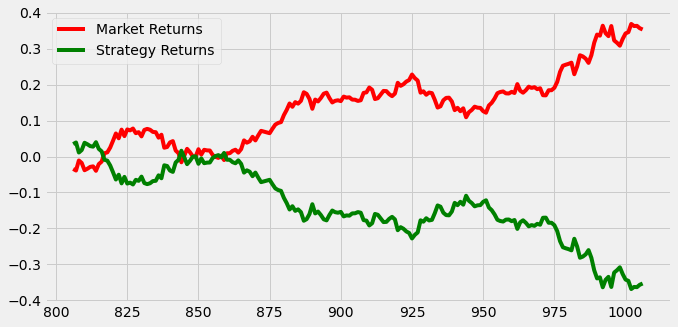

In [50]:
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()